<a href="https://colab.research.google.com/github/hidayatulloh28/UAS-AI/blob/main/Klasifikasi%20Obesitas%20menggunakan%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Obesitas Menggunakan KNN


Dibuat oleh : muhamad_hidayatulloh

In [15]:
import pandas as pd
from google.colab import files
filenya = files.upload()

Saving Obesity Classification.csv to Obesity Classification.csv


In [16]:
fdata="https://raw.githubusercontent.com/hidayatulloh28/UAS-AI/refs/heads/main/dataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [17]:
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")

df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [18]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [19]:
from sklearn.model_selection import train_test_split
y=df.Label
X=df.drop("Label", axis=1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [26]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

In [27]:
x_train

array([[-0.16627371,  1.37595437,  0.40691138,  0.51003937,  0.46405609,
         0.91092658],
       [ 0.4003747 ,  0.67446744, -1.76890489,  0.51003937,  0.57557218,
        -1.09778331],
       [ 0.46703921, -1.12309281, -0.31836071, -1.10126868, -1.05535075,
        -1.09778331],
       [ 1.46700699, -0.15854828,  1.13218346, -1.10126868, -1.05535075,
         0.91092658],
       [ 1.73366506, -0.64082054,  0.76954742, -1.45933713, -1.75232636,
         0.91092658],
       [-0.76625438, -0.29007708,  0.76954742,  1.22617628,  0.85436243,
         0.91092658],
       [-1.19957375,  0.98136798,  0.22559335,  0.6890736 ,  0.61739072,
         0.91092658],
       [-0.33293501,  0.27988105, -1.40626885,  0.51003937,  0.57557218,
        -1.09778331],
       [ 1.63366829, -1.29846454, -0.31836071, -1.81740559, -2.36566489,
        -1.09778331],
       [ 1.66700055, -1.07924987,  0.40691138, -1.63837136, -2.12869319,
         0.91092658],
       [ 1.23368118,  0.54293865, -1.76890489, -0.

In [34]:
x_train_scl

[1, 2, 3, 4, 5]

In [35]:
y_train

,Label
50,Normal Weight
67,Overweight
69,Underweight
99,Underweight
107,Underweight
...,...
65,Normal Weight
24,Obese
6,Obese
86,Underweight


In [37]:
y_train_enc = LabelEncoder().fit_transform(y_train)
y_test_enc = LabelEncoder().fit_transform(y_test)

In [38]:
y_train_enc

array([0, 2, 3, 3, 3, 2, 0, 2, 3, 3, 3, 0, 0, 3, 3, 0, 1, 2, 3, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 2, 0, 3, 1, 3, 3, 3, 0, 2, 2, 3, 1, 3, 3, 3, 3,
       2, 2, 1, 3, 3, 0, 1, 3, 3, 1, 3, 0, 3, 3, 2, 3, 0, 0, 3, 2, 0, 3,
       0, 1, 0, 2, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0])

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

x_train_scl = np.array([1, 2, 3, 4, 5])
y_train_enc = np.array([0, 1, 0, 1, 0])

x_train_scl = x_train_scl.reshape(-1, 1)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [52]:

knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')


KNN accuracy: 0.00


y_test: 2, knn_predictions: 2


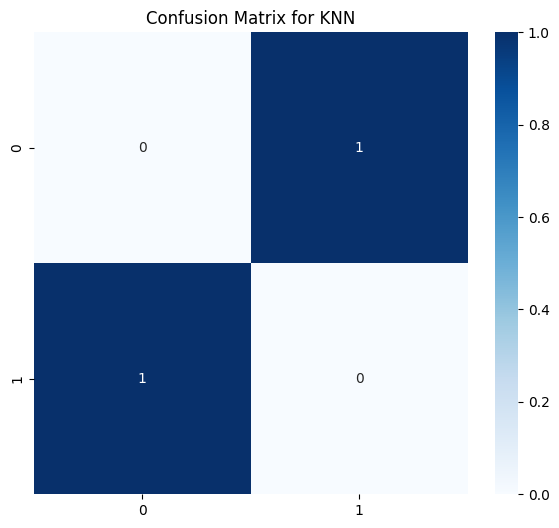

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scl, y_train)

knn_predictions = knn_classifier.predict(X_test_scl)

print(f"y_test: {len(y_test)}, knn_predictions: {len(knn_predictions)}")

if len(y_test) == len(knn_predictions):
    cm = confusion_matrix(y_test, knn_predictions)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for KNN')
    plt.show()
else:
    print("Mismatch between test labels and predictions!")


In [63]:
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scl = scaler.fit_transform(X_train)

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)

unique, counts = np.unique(y_train_enc, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")
knn = KNeighborsClassifier(n_neighbors=5)
skf = StratifiedKFold(n_splits=3)
score_sc = cross_val_score(knn, x_train_scl, y_train_enc, cv=skf)

print(score_sc)
print(f"Mean score with 3-fold CV: {score_sc.mean():.2f}")



Class distribution: {0: 4, 1: 4}
[0.33333333 0.33333333 0.5       ]
Mean score with 3-fold CV: 0.39


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scl = scaler.fit_transform(X_train)
x_test_scl = scaler.transform(X_test)

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

print(f"x_test_scl shape: {x_test_scl.shape}")
print(f"y_test_enc shape: {len(y_test_enc)}")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scl, y_train_enc)

train = []
test = []
train.append(knn.score(x_train_scl, y_train_enc))
test.append(knn.score(x_test_scl, y_test_enc))

print(f"Train scores: {train}")
print(f"Test scores: {test}")


x_test_scl shape: (2, 1)
y_test_enc shape: 2
Train scores: [0.75]
Test scores: [0.0]


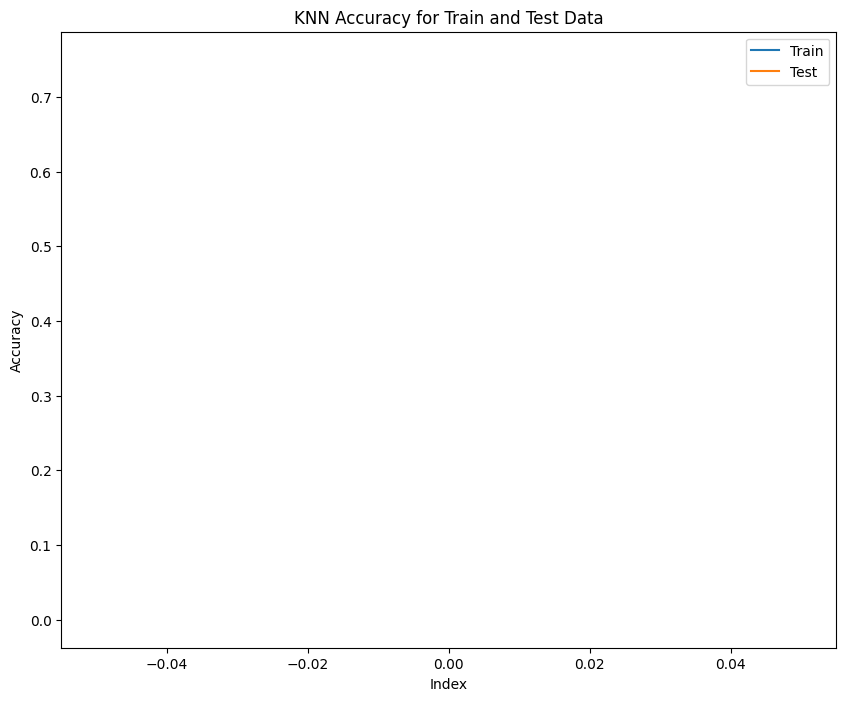

In [73]:
n_ = range(len(train))

plt.figure(figsize=(10, 8))
plt.plot(n_, train, label='Train')
plt.plot(n_, test, label='Test')

plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Train and Test Data')
plt.legend()
plt.show()


In [74]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 0.0
K Neighboard terbaik adalah 0
